In [1]:
# Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel (r'Superstore.xls')

## Task 5:
### Find out the yearly revenue and analyze the findings

#### a.) Create a column with Year field only give a suitable name to it

In [2]:
yearly_data = data['Order Date'].dt.strftime('%Y')
data['Year'] = pd.DataFrame(yearly_data)
print("This is the column containing the Year data.")
yearly_data.head()

This is the column containing the Year data.


0    2016
1    2016
2    2016
3    2015
4    2015
Name: Order Date, dtype: object

#### b.) Create a separate dataset from the data which will have two columns, one which is created in step a of this task and second the yearly sales/revenue


In [3]:
yearly_sales = data.groupby(['Year'])['Sales'].sum()
newdata = pd.DataFrame(yearly_sales)

newdata1 = data.groupby(['Year'])['Profit'].sum()
newdata1 = pd.DataFrame(newdata1)

result_year = newdata.merge(newdata1, left_index=True, right_index=True)
result_year.reset_index(inplace=True)

print("This is the new dataset which contains the yearly sales/revenue.")
result_year

This is the new dataset which contains the yearly sales/revenue.


,Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


#### c.) Plot this dataset

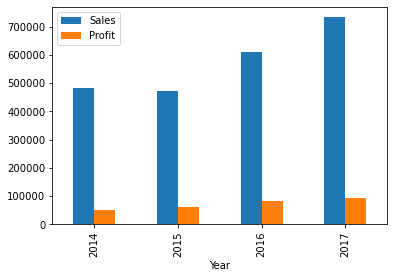

In [4]:
result_year.plot.bar(x='Year',y=['Sales','Profit'])

#### d.) Describe your analysis for the yearly revenue observations.

Calculating the % change in the sales and profit.

In [5]:
result_year['% Diff Sales'] = result_year.groupby('Year')['Sales'].pct_change()
result_year['% Diff Profit'] = result_year.groupby('Year')['Profit'].pct_change()
result_year

,Year,Sales,Profit,% Diff Sales,% Diff Profit
0,2014,484247.4981,49543.9741,NaN,NaN
1,2015,470532.5090,61618.6037,-0.028322,0.243715
2,2016,609205.5980,81795.1743,0.294715,0.327443
3,2017,733215.2552,93439.2696,0.203560,0.142357


##### Inferences:

1.) The Sales Revenue has been increasing since 2014, with an exception of 2015, while the Profits have also been increasing.

2.) The Sales for the Year 2015 had a lower turnout by 0.02833% as compared to 2014. While for the next years, the turnout is higher than the previous.

3.) While the sales for the Year 2015 were lower compared to 2014, the profit margin was higher.